In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.6271978697484 26.94092044341312
23.084387929023478 128.76633019282923
83.90203607582745 9.607616450407306
-40.6164708276303 -121.79279794937501
14.192992907335125 149.47949219831025
7.899324886677206 -34.009971691130204
-4.061050717827541 28.494345155345314
88.83617211937607 153.96741052078175
6.696327182038701 32.58069892381394
36.33337699329945 159.90690237951122
85.59325706595828 3.949383053316126
-52.02398236570093 -90.79625942839102
45.106887512724114 49.683566626014425
18.85048539896779 -134.87931562001341
37.81632305551672 24.10579437607268
17.285249430852858 -71.59035687497726
-67.71950830670399 -23.522242907098246
-89.527106858919 62.82693808218042
7.073152132305168 124.39993276263266
30.499675030741244 -69.9363493019331
-55.764003539599166 34.07441540036291
-69.7161719690393 -169.51679834700258
15.094952400452513 -46.68394185874712
13.207382647339301 -109.26736660967518
-15.81689441893495 166.65457626033913
-82.96628796244913 -117.32467299747123
-20.090866460584976 123.21

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | itoman
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | uvira
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | yirol
City not found. Skipping...
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | fort-shevchenko
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | keratea
Processing Record 15 of Set 1 | pedernales
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | bongued
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | vaini
Processi

Processing Record 36 of Set 4 | kodiak
Processing Record 37 of Set 4 | belmonte
Processing Record 38 of Set 4 | coos bay
Processing Record 39 of Set 4 | williams lake
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | minab
Processing Record 43 of Set 4 | pembroke
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | dondo
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | doha
Processing Record 49 of Set 4 | harwich
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | kropotkin
Processing Record 2 of Set 5 | moose factory
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | vicuna
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of Se

Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | zapolyarnyy
Processing Record 32 of Set 8 | babanusah
City not found. Skipping...
Processing Record 33 of Set 8 | kapoeta
Processing Record 34 of Set 8 | suez
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | acobamba
Processing Record 37 of Set 8 | carballo
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | mbouda
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | talah
City not found. Skipping...
Processing Record 43 of Set 8 | lufilufi
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | coshocton
Processing Record 46 of Set 8 | kumbo
Processing Record 47 of Set 8 | tacuarembo
Processing Record 48 of Set 8 | tautira
Processing Record 49 of Set 8 | tilichiki
Processing Record 50 of Set 8 | samusu
City not found. Skipping...
Processing Record 1 of Set 9 | guasd

Processing Record 18 of Set 12 | hammerfest
Processing Record 19 of Set 12 | huichapan
Processing Record 20 of Set 12 | kraljevo
Processing Record 21 of Set 12 | naryan-mar
Processing Record 22 of Set 12 | shchuchye
City not found. Skipping...
Processing Record 23 of Set 12 | mudigere
Processing Record 24 of Set 12 | grimshaw
Processing Record 25 of Set 12 | zile
Processing Record 26 of Set 12 | bujumbura
Processing Record 27 of Set 12 | grong
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | sangar
Processing Record 30 of Set 12 | carupano
Processing Record 31 of Set 12 | banjar
Processing Record 32 of Set 12 | dalvik
Processing Record 33 of Set 12 | makrisia
Processing Record 34 of Set 12 | diu
Processing Record 35 of Set 12 | meulaboh
Processing Record 36 of Set 12 | krasnogvardeyskiy
Processing Record 37 of Set 12 | starozhilovo
Processing Record 38 of Set 12 | portsmouth
Processing Record 39 of Set 12 | verkhoyansk
Processing Record 40 of Set 12 | oranjestad
P

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,66.18,96,100,5.01,ZA,2022-12-12 00:40:50
1,Itoman,26.1247,127.6694,69.82,64,20,13.80,JP,2022-12-12 00:40:50
2,Rikitea,-23.1203,-134.9692,76.53,78,6,18.59,PF,2022-12-12 00:39:24
3,Lorengau,-2.0226,147.2712,83.08,75,100,4.34,PG,2022-12-12 00:40:51
4,Sao Filipe,14.8961,-24.4956,77.86,73,0,8.93,CV,2022-12-12 00:40:51
5,Uvira,-3.4067,29.1458,71.06,86,83,4.09,CD,2022-12-12 00:40:51
6,Chokurdakh,70.6333,147.9167,-24.21,100,100,6.98,RU,2022-12-12 00:40:52
7,Castro,-24.7911,-50.0119,66.18,95,100,1.28,BR,2022-12-12 00:40:52
8,Fort-Shevchenko,44.5086,50.2630,28.87,49,0,21.34,KZ,2022-12-12 00:40:52
9,Hilo,19.7297,-155.0900,80.33,59,20,4.61,US,2022-12-12 00:40:29


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-12-12 00:40:50,-33.5906,26.8910,66.18,96,100,5.01
1,Itoman,JP,2022-12-12 00:40:50,26.1247,127.6694,69.82,64,20,13.80
2,Rikitea,PF,2022-12-12 00:39:24,-23.1203,-134.9692,76.53,78,6,18.59
3,Lorengau,PG,2022-12-12 00:40:51,-2.0226,147.2712,83.08,75,100,4.34
4,Sao Filipe,CV,2022-12-12 00:40:51,14.8961,-24.4956,77.86,73,0,8.93
...,...,...,...,...,...,...,...,...,...
559,Obersiggenthal,CH,2022-12-12 00:56:08,47.4875,8.2965,23.49,93,40,3.44
560,Arys,KZ,2022-12-12 00:56:08,42.4252,68.7950,21.85,60,99,4.59
561,Tezu,IN,2022-12-12 00:56:08,27.9167,96.1667,59.16,44,0,3.65
562,Dwarka,IN,2022-12-12 00:56:09,22.2394,68.9678,72.70,51,0,10.94


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

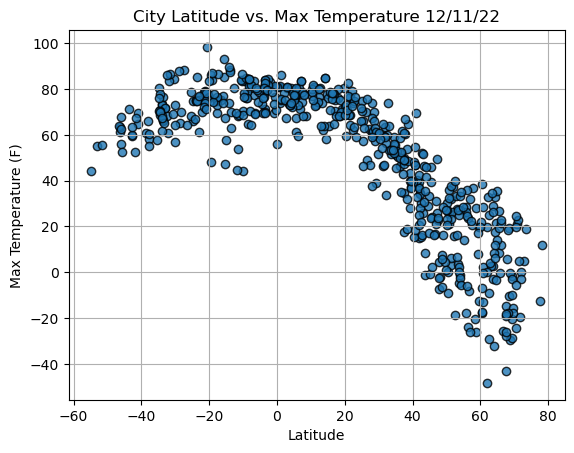

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

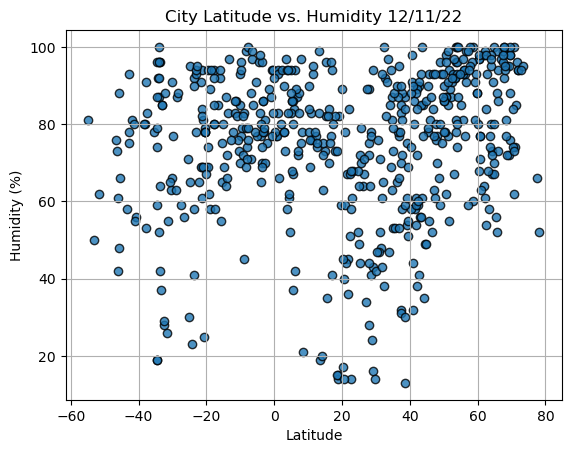

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

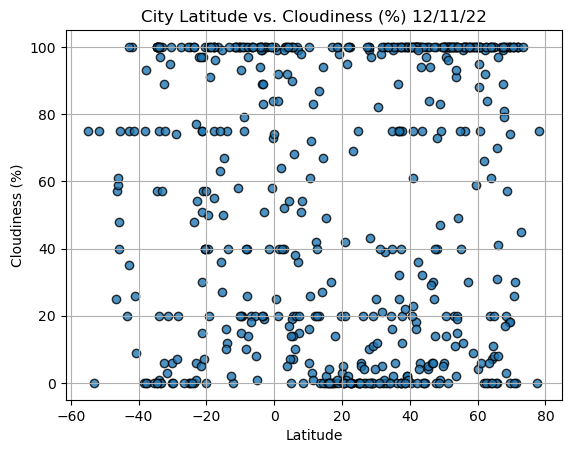

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

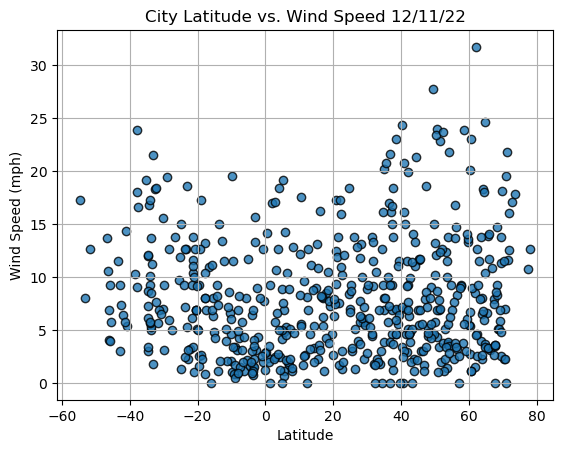

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

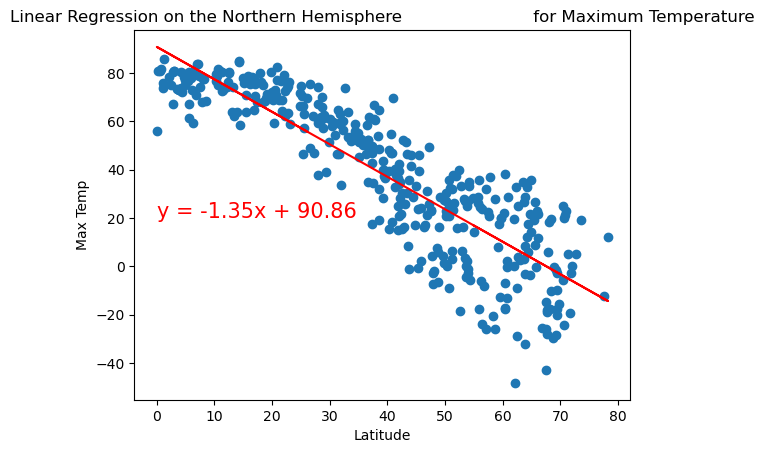

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,20))

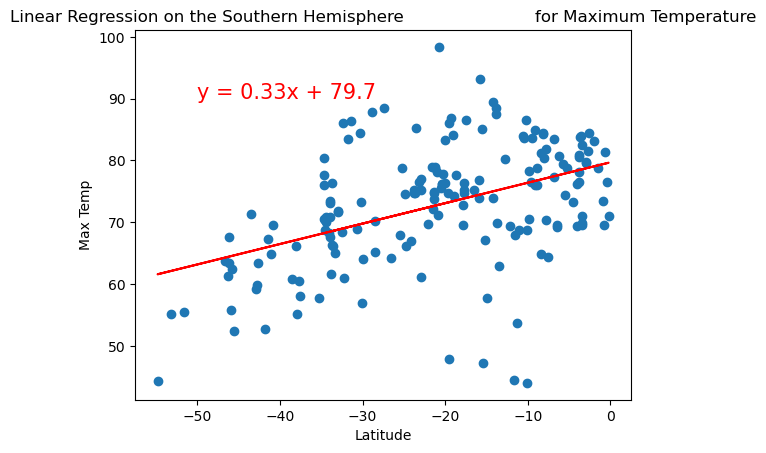

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

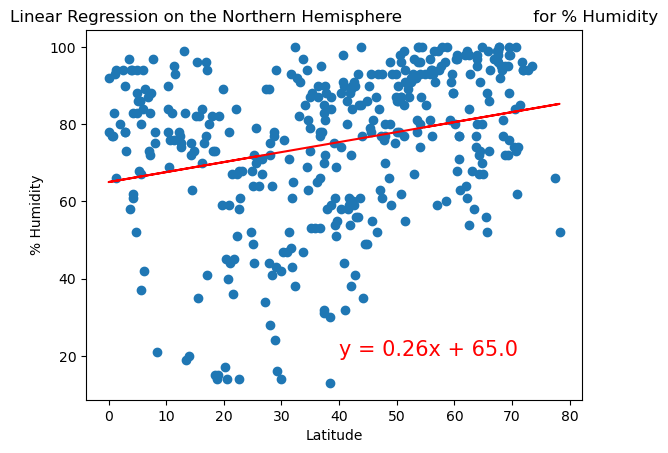

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

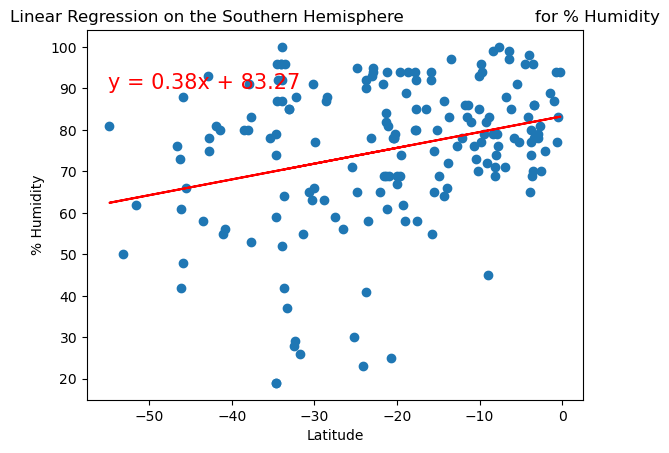

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,90))

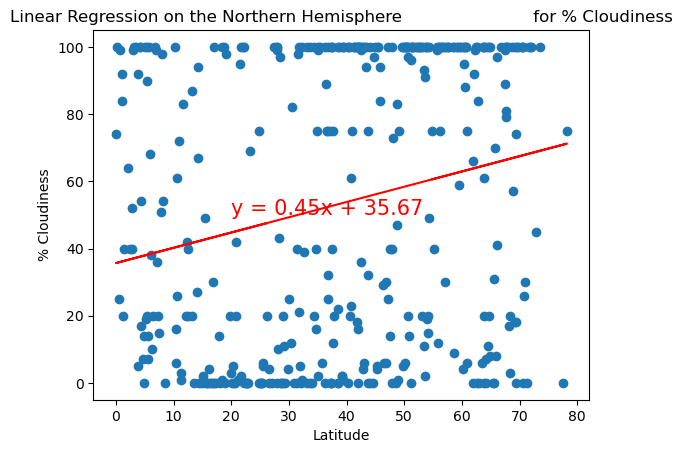

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness','% Cloudiness',(20,50))

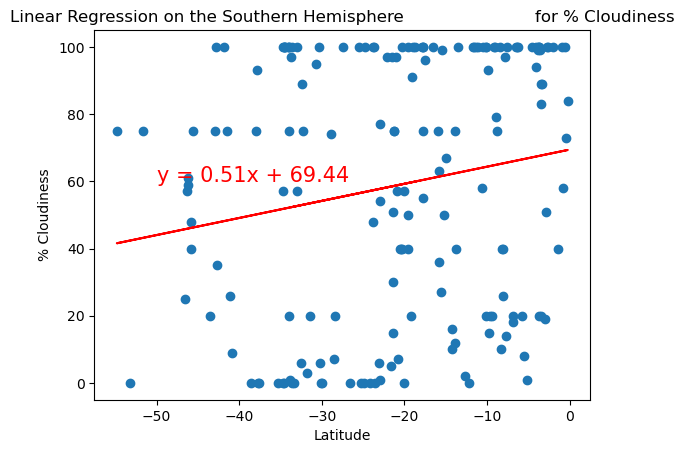

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


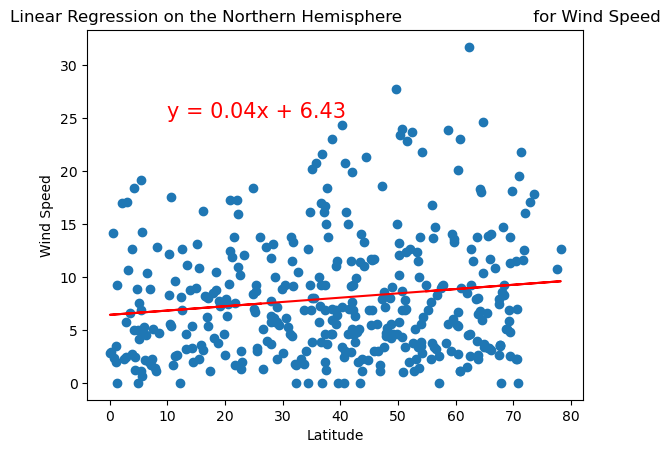

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

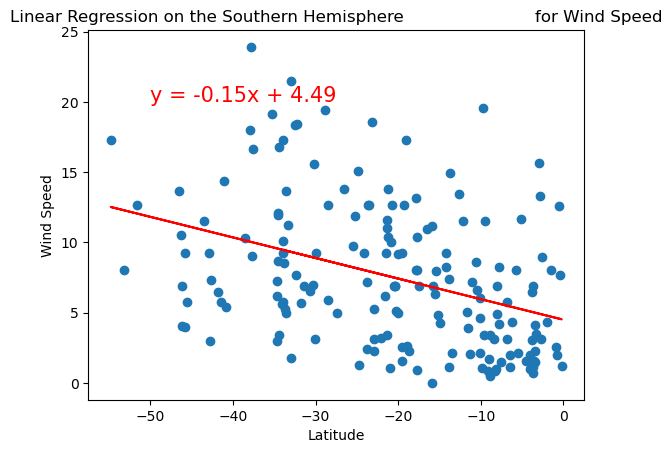

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))